# Import software libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

# Load and preview the data

In [22]:
df=pd.read_pickle("users_data_final.pickle")
df

,user_id,number_transactions,total_amount_usd,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,...,duration,campaign,pdays,previous,term_deposit,device_desktop,device_tablet,single,age_group_encoded,month_joined
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.00,1,0,0,0,0,0,0,...,261,1,-1,0,False,0,0,0,4,8
1,bb92765a-08de-4963-b432-496524b39157,0.0,1369.42,0,1,0,0,0,0,0,...,151,1,-1,0,False,1,0,1,2,7
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.00,0,0,1,0,0,0,0,...,76,1,-1,0,False,0,0,0,1,6
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,0.0,1369.42,0,0,0,1,0,0,0,...,92,1,-1,0,False,0,1,0,3,6
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.00,0,0,0,0,0,0,0,...,198,1,-1,0,False,0,0,1,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45211,a218c1d6-880a-4431-a314-a1bd3dc36b21,2.0,825.00,0,1,0,0,0,0,0,...,977,3,-1,0,True,1,0,0,3,12
45212,6a6bf402-9416-4e71-97c6-727e8298a3a5,4.0,1729.00,0,0,0,0,1,0,0,...,456,2,-1,0,True,1,0,0,5,11
45213,be32ba96-b178-4b54-b32a-f75b714793df,2.0,5715.00,0,0,0,0,1,0,0,...,1127,5,184,3,True,0,0,0,5,6
45214,44623a48-4e9b-48fd-b155-a17d1c06a754,0.0,1369.42,0,0,0,1,0,0,0,...,508,4,-1,0,False,1,0,0,4,9


# Check the shape of the data

In [23]:
df.shape

(45179, 33)

# Check the data types

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45179 entries, 0 to 45215
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              45179 non-null  object 
 1   number_transactions  45179 non-null  float64
 2   total_amount_usd     45179 non-null  float64
 3   job_management       45179 non-null  int64  
 4   job_technician       45179 non-null  int64  
 5   job_entrepreneur     45179 non-null  int64  
 6   job_blue-collar      45179 non-null  int64  
 7   job_retired          45179 non-null  int64  
 8   job_admin.           45179 non-null  int64  
 9   job_services         45179 non-null  int64  
 10  job_self-employed    45179 non-null  int64  
 11  job_unemployed       45179 non-null  int64  
 12  job_housemaid        45179 non-null  int64  
 13  job_student          45179 non-null  int64  
 14  education_tertiary   45179 non-null  int64  
 15  education_secondary  45179 non-null  int6

# Explore the distribution of the target variable

- You need to plot the distribution of the target column (term_deposit) and explain what is the problem of the distribution.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_stats/counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_stats/counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


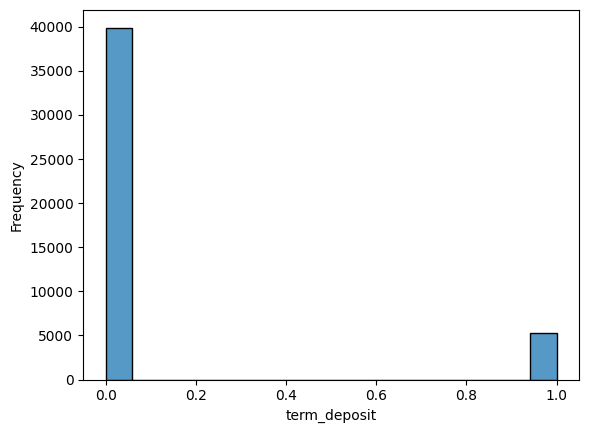

In [25]:
sns.histplot(data=df, x="term_deposit" )
plt.ylabel("Frequency")
plt.show()

In [26]:
#the most of values = False

In [27]:
z=df.drop("user_id", axis=1)

z

,number_transactions,total_amount_usd,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,...,duration,campaign,pdays,previous,term_deposit,device_desktop,device_tablet,single,age_group_encoded,month_joined
0,3.0,2143.00,1,0,0,0,0,0,0,0,...,261,1,-1,0,False,0,0,0,4,8
1,0.0,1369.42,0,1,0,0,0,0,0,0,...,151,1,-1,0,False,1,0,1,2,7
2,2.0,2.00,0,0,1,0,0,0,0,0,...,76,1,-1,0,False,0,0,0,1,6
3,0.0,1369.42,0,0,0,1,0,0,0,0,...,92,1,-1,0,False,0,1,0,3,6
4,1.0,1.00,0,0,0,0,0,0,0,0,...,198,1,-1,0,False,0,0,1,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45211,2.0,825.00,0,1,0,0,0,0,0,0,...,977,3,-1,0,True,1,0,0,3,12
45212,4.0,1729.00,0,0,0,0,1,0,0,0,...,456,2,-1,0,True,1,0,0,5,11
45213,2.0,5715.00,0,0,0,0,1,0,0,0,...,1127,5,184,3,True,0,0,0,5,6
45214,0.0,1369.42,0,0,0,1,0,0,0,0,...,508,4,-1,0,False,1,0,0,4,9


# Apply oversampling or SMOTE to the target label

In [33]:
X =z.drop("term_deposit", axis=1)
y = z["term_deposit"]

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
data_resampled= pd.DataFrame(X_resampled , columns= X.columns)
data_resampled["term_deposit"]= y_resampled

df_1 = data_resampled["term_deposit"].value_counts()/ len(data_resampled)
df_1

term_deposit
False    0.5
True     0.5
Name: count, dtype: float64

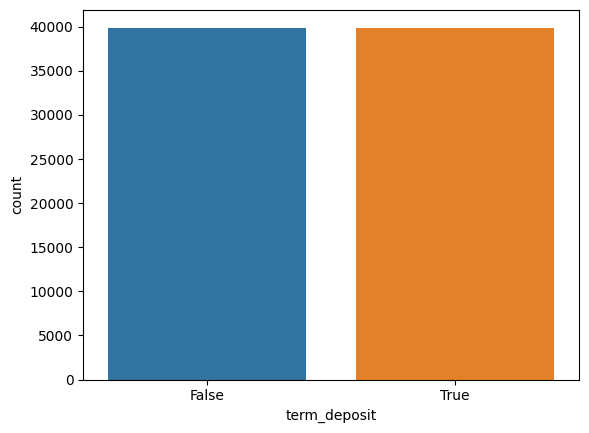

In [29]:
sns.countplot(x="term_deposit", data=data_resampled)
plt.show()

# Normalize the data

In [34]:
scaler = MinMaxScaler()
normalized = scaler.fit_transform(X)
df_2 = pd.DataFrame(normalized, columns=X.columns)

df_2['term_deposit'] = y
df_2.head(15)

,number_transactions,total_amount_usd,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,...,duration,campaign,pdays,previous,device_desktop,device_tablet,single,age_group_encoded,month_joined,term_deposit
0,0.15,0.092259,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.053070,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.636364,False
1,0.00,0.085236,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030704,0.0,0.0,0.0,1.0,0.0,1.0,0.333333,0.545455,False
2,0.10,0.072822,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.015453,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.454545,False
3,0.00,0.085236,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.018707,0.0,0.0,0.0,0.0,1.0,0.0,0.500000,0.454545,False
4,0.05,0.072812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.040260,0.0,0.0,0.0,0.0,0.0,1.0,0.166667,0.636364,False
5,0.10,0.074901,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.028264,0.0,0.0,0.0,1.0,0.0,0.0,0.333333,0.454545,False
6,0.10,0.076862,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.044124,0.0,0.0,0.0,0.0,0.0,1.0,0.166667,0.090909,False
7,0.05,0.072822,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.077267,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,1.000000,False
8,0.00,0.085236,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.010167,0.0,0.0,0.0,1.0,0.0,0.0,0.666667,0.636364,False
9,0.10,0.078187,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.011183,0.0,0.0,0.0,0.0,0.0,1.0,0.333333,0.727273,False


# Standardlize the data

In [35]:
scaler = StandardScaler()
X_stand = scaler.fit_transform(X)
df_3 = pd.DataFrame(X_stand, columns=X.columns)

df_3['term_deposit'] = y
df_3.head(15)

,number_transactions,total_amount_usd,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,...,duration,campaign,pdays,previous,device_desktop,device_tablet,single,age_group_encoded,month_joined,term_deposit
0,-0.026089,0.285937,1.94405,-0.449427,-0.184354,-0.523736,-0.229579,-0.359395,-0.318122,-0.190179,...,0.011244,-0.569209,-0.411483,-0.251868,-0.605011,-0.372153,-0.628092,1.674044,0.437578,False
1,-0.826099,-0.000123,-0.51439,2.225055,-0.184354,-0.523736,-0.229579,-0.359395,-0.318122,-0.190179,...,-0.416309,-0.569209,-0.411483,-0.251868,1.652861,-0.372153,1.592123,-0.132969,0.145892,False
2,-0.292759,-0.505776,-0.51439,-0.449427,5.424350,-0.523736,-0.229579,-0.359395,-0.318122,-0.190179,...,-0.707822,-0.569209,-0.411483,-0.251868,-0.605011,-0.372153,-0.628092,-1.036476,-0.145795,False
3,-0.826099,-0.000123,-0.51439,-0.449427,-0.184354,1.909360,-0.229579,-0.359395,-0.318122,-0.190179,...,-0.645633,-0.569209,-0.411483,-0.251868,-0.605011,2.687069,-0.628092,0.770537,-0.145795,False
4,-0.559429,-0.506146,-0.51439,-0.449427,-0.184354,-0.523736,-0.229579,-0.359395,-0.318122,-0.190179,...,-0.233627,-0.569209,-0.411483,-0.251868,-0.605011,-0.372153,1.592123,-1.036476,0.437578,False
5,-0.292759,-0.421095,1.94405,-0.449427,-0.184354,-0.523736,-0.229579,-0.359395,-0.318122,-0.190179,...,-0.462951,-0.569209,-0.411483,-0.251868,1.652861,-0.372153,-0.628092,-0.132969,-0.145795,False
6,-0.292759,-0.341221,1.94405,-0.449427,-0.184354,-0.523736,-0.229579,-0.359395,-0.318122,-0.190179,...,-0.159777,-0.569209,-0.411483,-0.251868,-0.605011,-0.372153,1.592123,-1.036476,-1.312542,False
7,-0.559429,-0.505776,-0.51439,-0.449427,5.424350,-0.523736,-0.229579,-0.359395,-0.318122,-0.190179,...,0.473778,-0.569209,-0.411483,-0.251868,-0.605011,-0.372153,-0.628092,-0.132969,1.604325,False
8,-0.826099,-0.000123,-0.51439,-0.449427,-0.184354,-0.523736,4.355804,-0.359395,-0.318122,-0.190179,...,-0.808880,-0.569209,-0.411483,-0.251868,1.652861,-0.372153,-0.628092,1.674044,0.437578,False
9,-0.292759,-0.287232,-0.51439,2.225055,-0.184354,-0.523736,-0.229579,-0.359395,-0.318122,-0.190179,...,-0.789446,-0.569209,-0.411483,-0.251868,-0.605011,-0.372153,1.592123,-0.132969,0.729265,False


# Plot the PCA

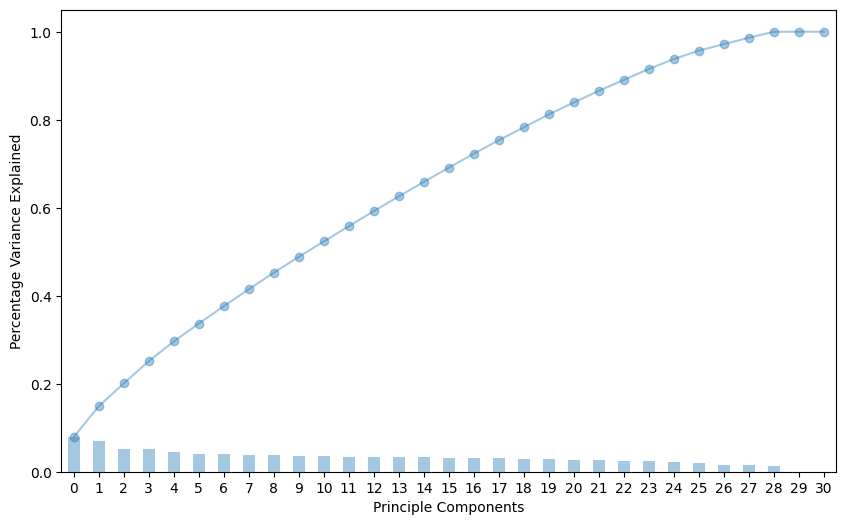

In [42]:
X_stand = df_3.drop(columns=['term_deposit'])
pca = PCA()
pca.fit(X_stand)

plt.figure(figsize=(10,6))
exp_var = pd.Series(pca.explained_variance_ratio_) 
exp_var.plot(kind="bar", alpha=0.4)

total = 0
var_ls = []
for x in exp_var:
    total = total + x
    var_ls.append(total)


pd.Series(var_ls).plot(marker="o", alpha=0.4)
plt.xlabel("Principle Components")
plt.ylabel("Percentage Variance Explained")
plt.show();